<a href="https://colab.research.google.com/github/davisvegh/Machine-learning-specialization/blob/main/Advanced_Learning_Algorithms_Machine_Learning_Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Networks
####How do they work

Collecting data for input and deciding whether a product will be a top seller or not.

Previously f(x) = 1 / 1 + e(-z) was marking the output of the learning algorightm of the logistic regression.

Now we add "a" to denote the output of the logistic regression algorithm.
This **a** stands for activation function and shows how high of an output it sends towards the other neurons downstream. 

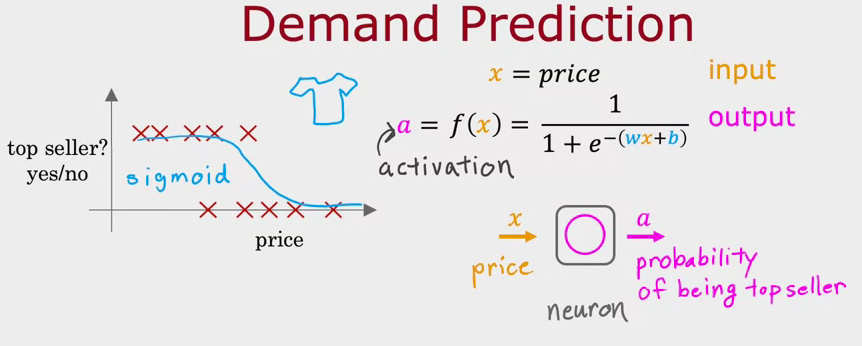

With vector inputs, the first (input) layer, gets 4 different numbers, which gets converted to a vector (a) by the second, in this case hidden layer which uses those four numbers to compute the new numbers also called activation values. Then the final layer, the output layer of the neural network used those three numbers to compute one number. 
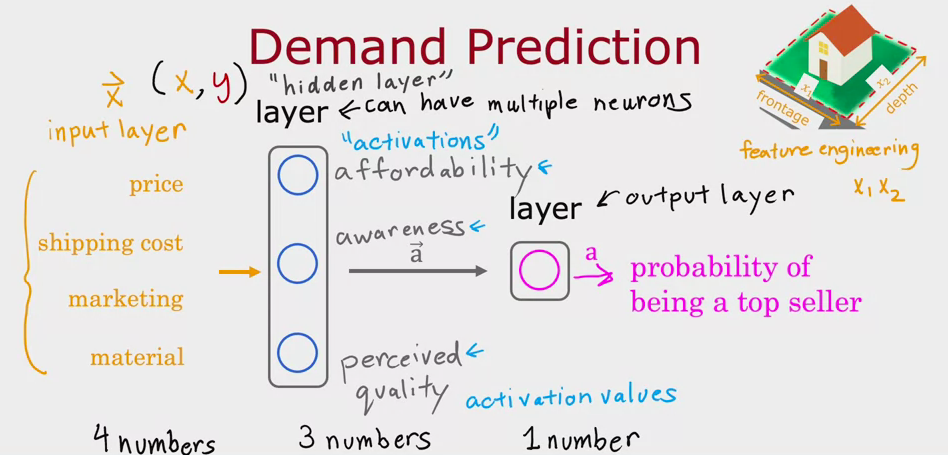

Multi-layer perceptron =  multiple hidden layers

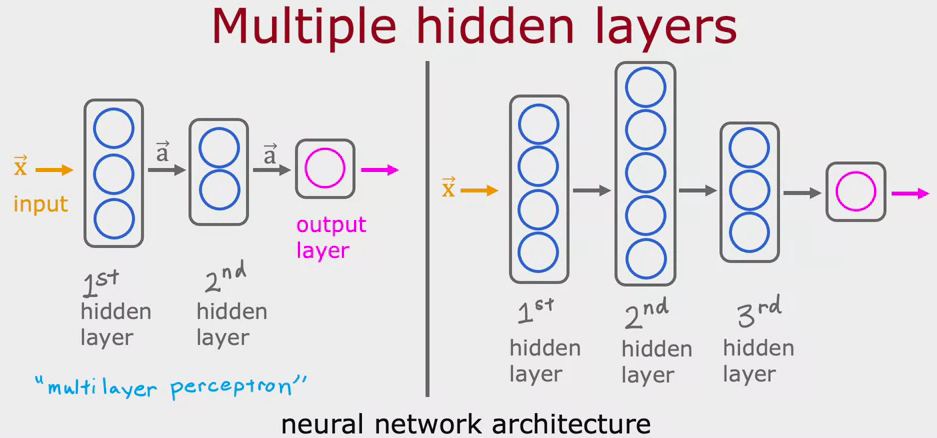

For face recognition, the first hidden layer usually searches for lines and edges, the second hidden layer for small parts of the face like and eye or a mouth, the third hidden layer for big parts of the whole face:

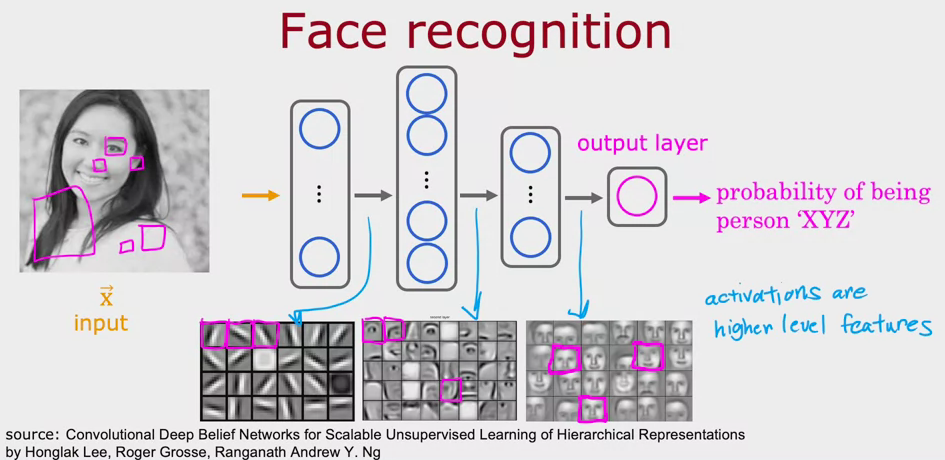

##Neural network layer

This hidden layer inputs four numbers and these four numbers are inputs to each of three neurons. Each of these three neurons is just implementing a little logistic regression unit or a little bit logistic regression function. The first neuron has two parameters, w and b. To denote that, this is the first hidden unit, subscripted as w_1, b_1. 

What it does is I'll output some activation value **a**, *which is g of w_1 in a DOT product with x + b_1*, which = z.

g of z is the logistic function, 1 over 1 plus e to the negative z. This ends up being a number 0.3 and that's the activation value **a** of the first neuron. To denote that this is the first neuron, a_1 is there, so a_1 = 0.3.

There's a 0.3 chance of this being highly affordable based on the input features. 

The second neuron has parameters w_2 and b_2, and these are the parameters of the second logistic unit. It computes a_2 equals the logistic function g applied to w_2 dot product x + b_2 and this may be 0.7. Because in this example, there's a 0.7 chance that we think the potential buyers will be aware of this t-shirt. 

Similarly the third neuron = 0.2. 

In this example, these three neurons output 0.3, 0.7, and 0.2, and this vector of three numbers becomes the vector of activation values a, that is then passed to the final output layer of this neural network. 

For neural networks with multiple layers, it'll be useful to give the layers different numbers. The input layer is also sometimes called layer 0 and today, there are neural networks that can have dozens or even hundreds of layers. But in order to introduce notation we use superscript square bracket 1 to index into different layers. In particular, a superscript in square brackets 1, is a notation to denote the output of layer 1 of this hidden layer of this neural network, and similarly, w_1, b_1 here are the parameters of the first unit in layer 1 of the neural network, so I'm also going to add a superscript in square brackets 1. Its parameters are also denoted here w^[1].

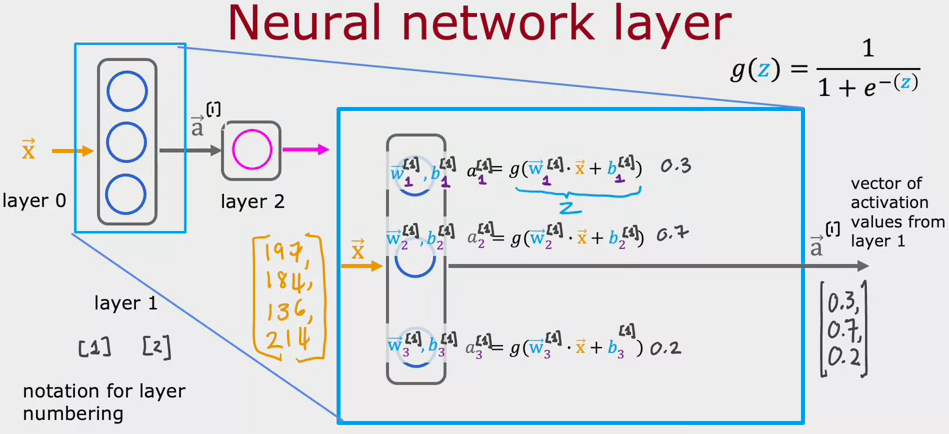

Output layer:

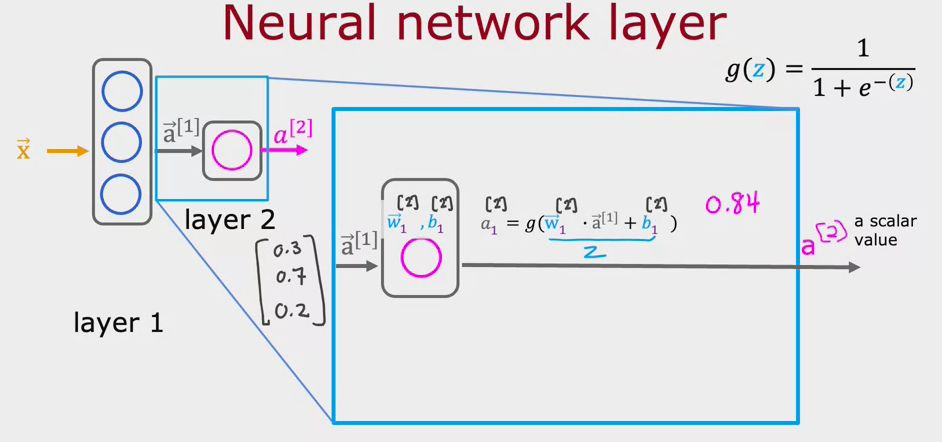

Once the neural network has computed a_2, there's one final optional step to implement or not, which is if a binary prediction is needed, 1 or 0, is this a top seller? Yes or no? 

The number superscript square brackets 2 subscript 1 can be taken, and this is the number 0.84 computed, and threshold this at 0.5. If it's greater than 0.5, predicted y hat = 1 and if it is less than 0.5, then predict y hat = 0. 

This can give the final prediction y hat as either one or zero, if more is needed other than just the probability of it being a top seller.

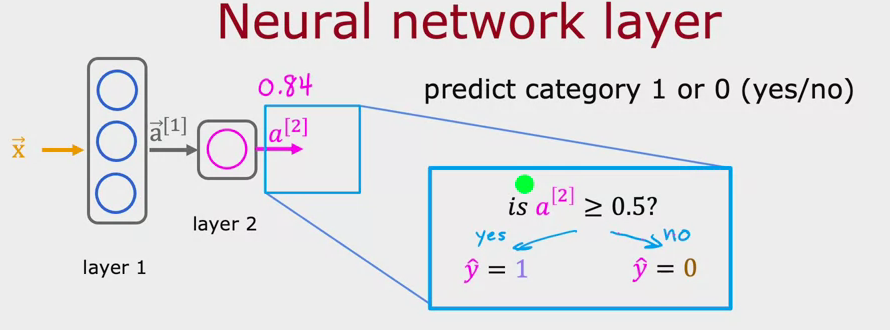

More complex Neural network:

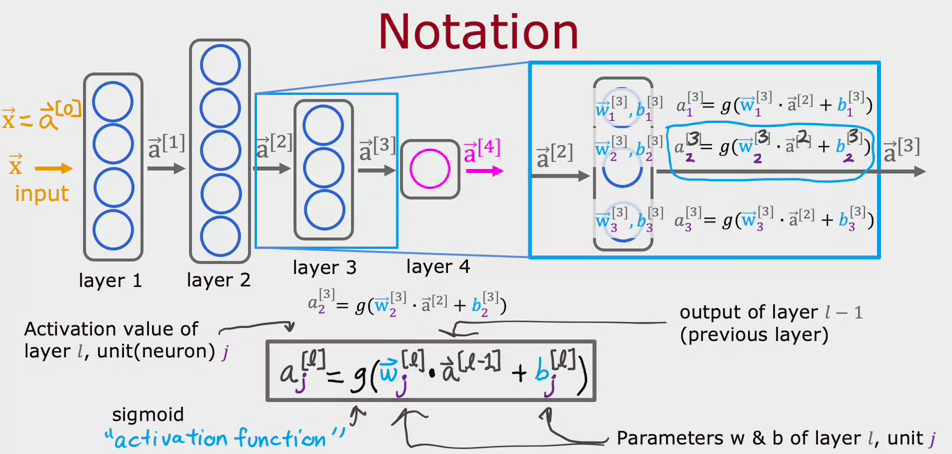

Inference: making predictions (forward propagation)

A handwritten digit recognition is a binary classification problem. The neural network here is making a prediction about the digit, which is done by a forward propagation algorithm.

By using an 8 by 8 image, we have a 64 pixel matrix, in which each pixel has values between 0 and 255 (255 is white and 0 denotes black).

With the 64 input features, using hidden layers, the algorithm has to predict the probability of what the number in question is.

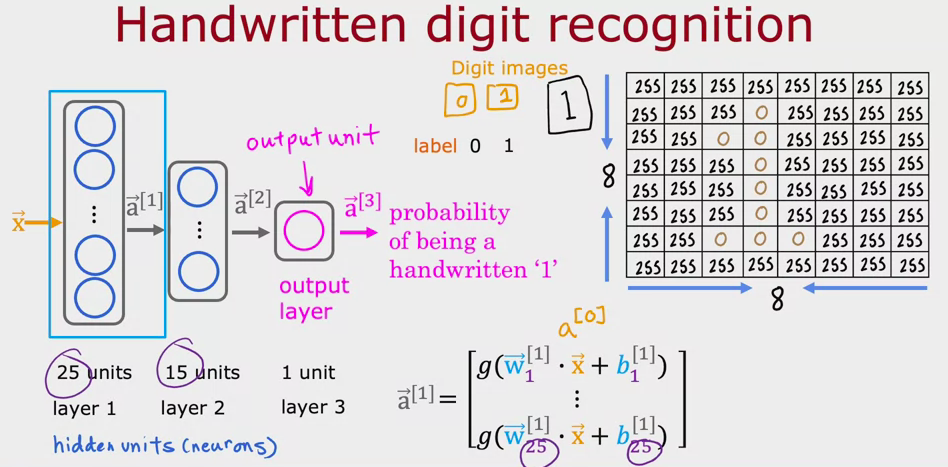

Output layer:

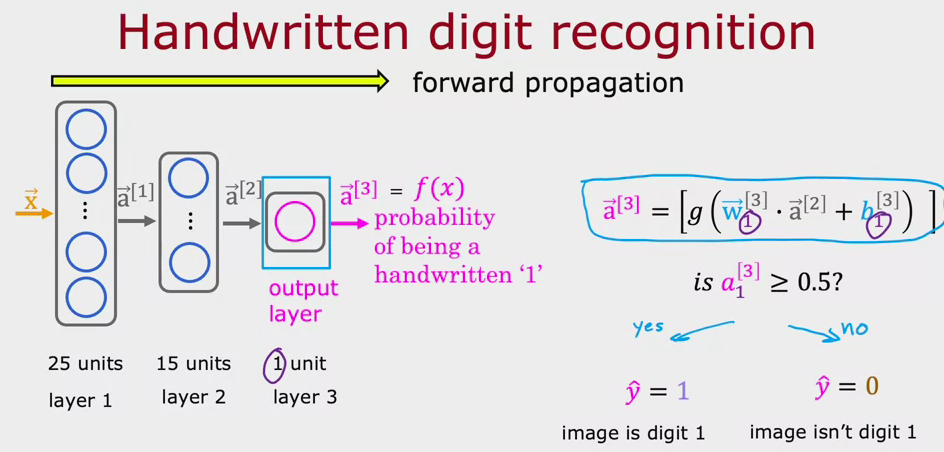

# Lab - Neurons and Layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
#from lab_utils_common import dlc
#from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
#plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Neuron without activation - Linear regression

𝑓𝐰,𝑏(𝑥(𝑖))=𝐰⋅𝑥(𝑖)+𝑏

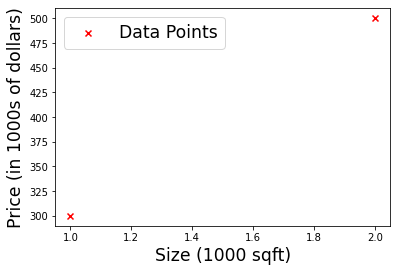

In [ ]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

Defining one neuron and comparing it with linear regression:

In [ ]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )
linear_layer.get_weights()
# There are no weights yet so making an input from X_train (one example) which will create weights too.
# The input must be 2-D, reshaping:

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

# The result is a tensor (another name for an array) with a shape of (1,1) or one entry.
# Weights and bias as follows. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

tf.Tensor([[-0.62265396]], shape=(1, 1), dtype=float32)
w = [[-0.62265396]], b=[0.]


In [ ]:
# A linear regression model with a single input feature will have a single weight and bias. This matches the dimensions of the linear_layer above.
# The weights are initialized to random values so let's set them to some known values.

set_w = np.array([[200]])
set_b = np.array([100])

In [ ]:
# set_weights takes a list of numpy arrays

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

# Let's compare equation (1) to the layer output.

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

# They produce the same values! Now, we can use our linear layer to make predictions on our training data.

prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

[array([[200.]], dtype=float32), array([100.], dtype=float32)]
tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [ ]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

NameError: ignored

# Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in logistic regression:
𝑓𝐰,𝑏(𝑥(𝑖))=𝑔(𝐰𝑥(𝑖)+𝑏)<br>
where<br>
𝑔(𝑥)=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑥)

 
Let's set  𝑤 and  𝑏 to some known values and check the model.


### DataSet

In [ ]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32)
print(X_train)
X_train = X_train.reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
print(X_train)

pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

# Logistic Neuron

We can implement a 'logistic neuron' by adding a sigmoid activation. Creating a Tensorflow Model that contains the logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [ ]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

model.summary()

In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

In [ ]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

In [ ]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)